In [2]:
try:
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    print("\n")
    print("Libraries imported")
    print("\n")
except ImportError as e:
    print(e)



Libraries imported




# Importing the data

In [3]:
df = pd.read_csv('data/stud.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Addig average and total score

In [5]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


# Plotting visualizations

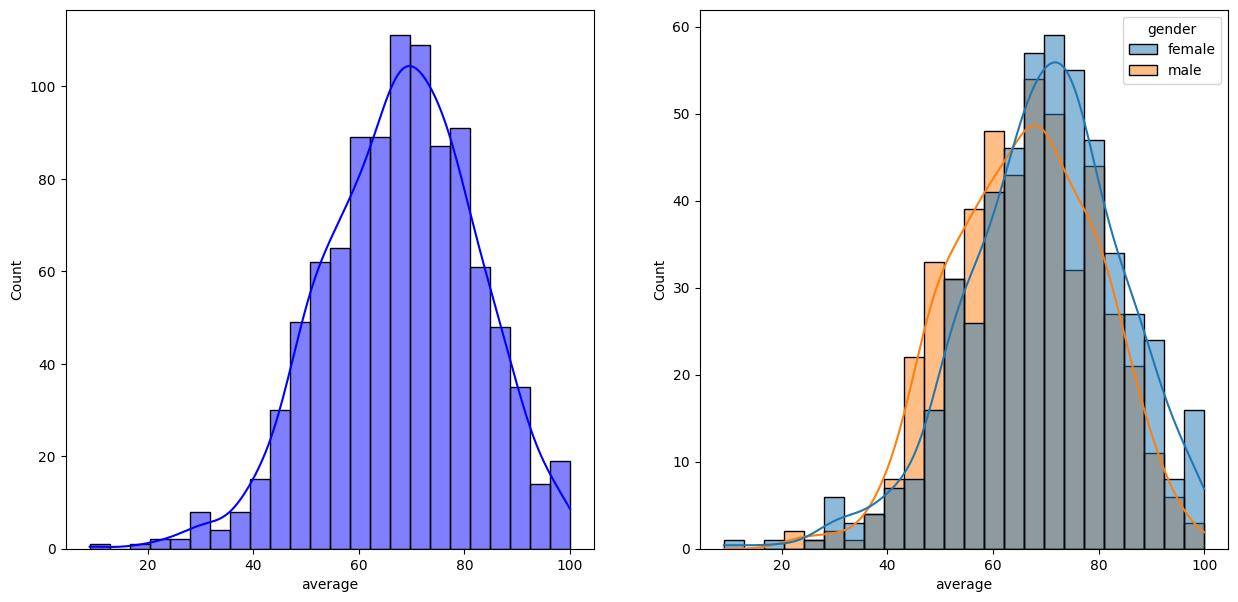

In [8]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',kde=True,color='Blue')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue=df['gender'])
plt.show()

[]

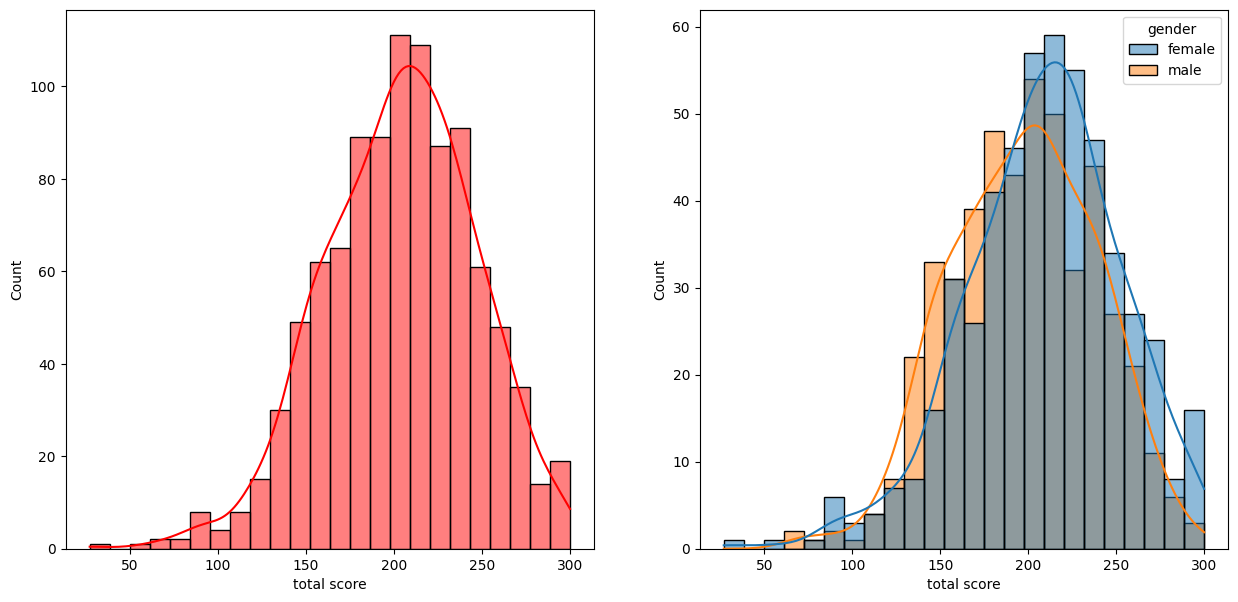

In [10]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total score',kde=True,color='red')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue=df['gender'])
plt.plot()

(np.float64(-1.25), np.float64(1.25), np.float64(-1.25), np.float64(1.25))

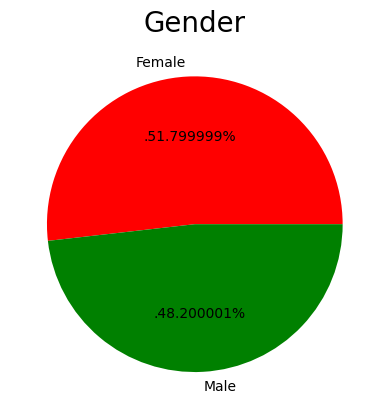

In [17]:
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')


/var/folders/5q/t0vydvmd0l54twqf6m8prbhw0000gn/T/ipykernel_5125/1720327845.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)


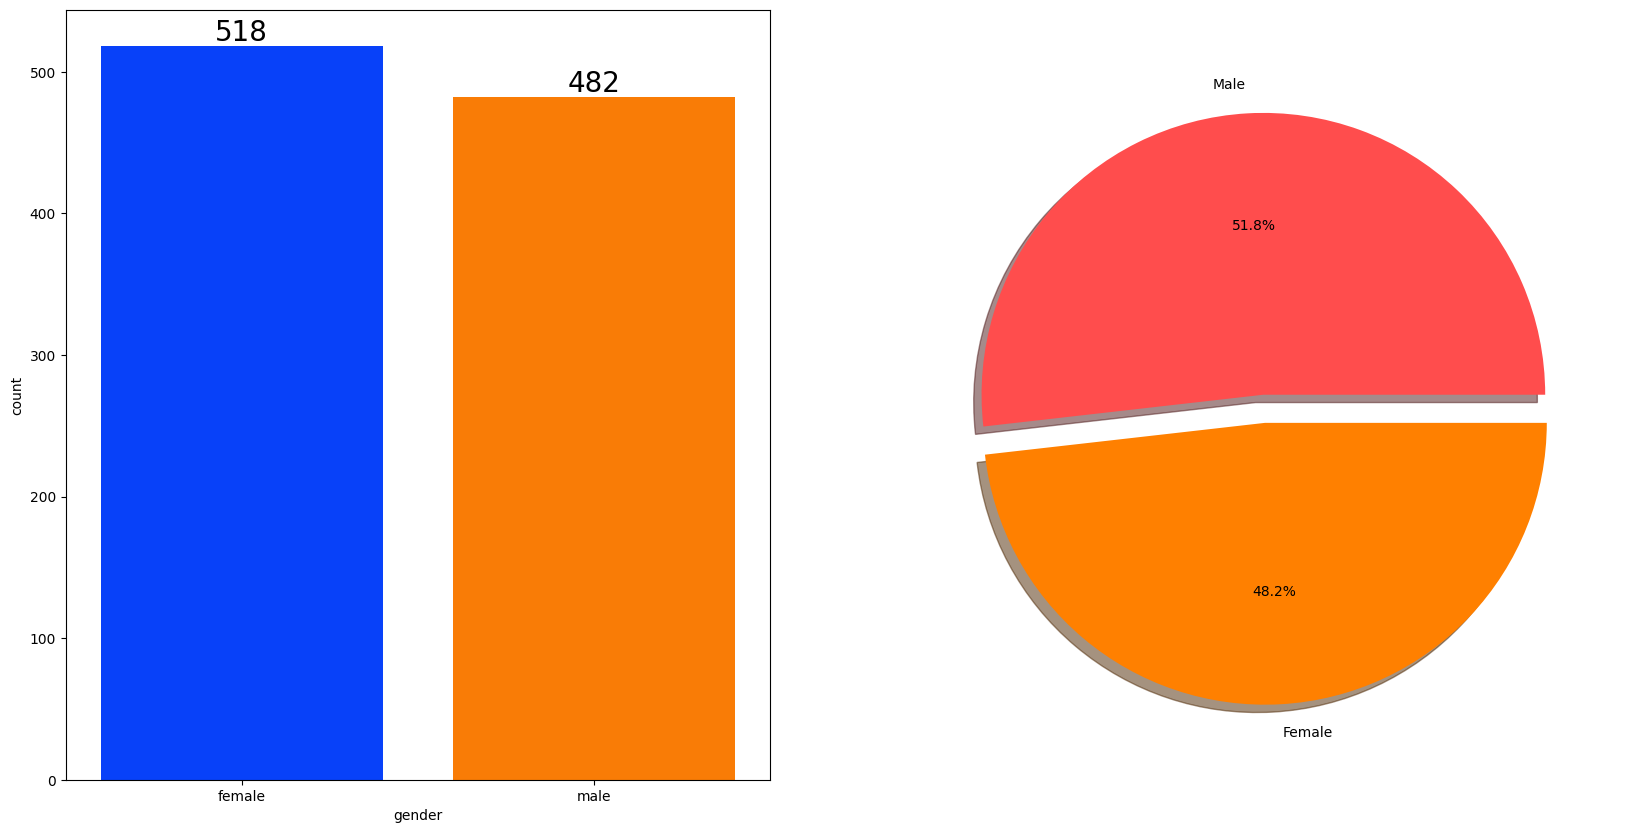

In [20]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

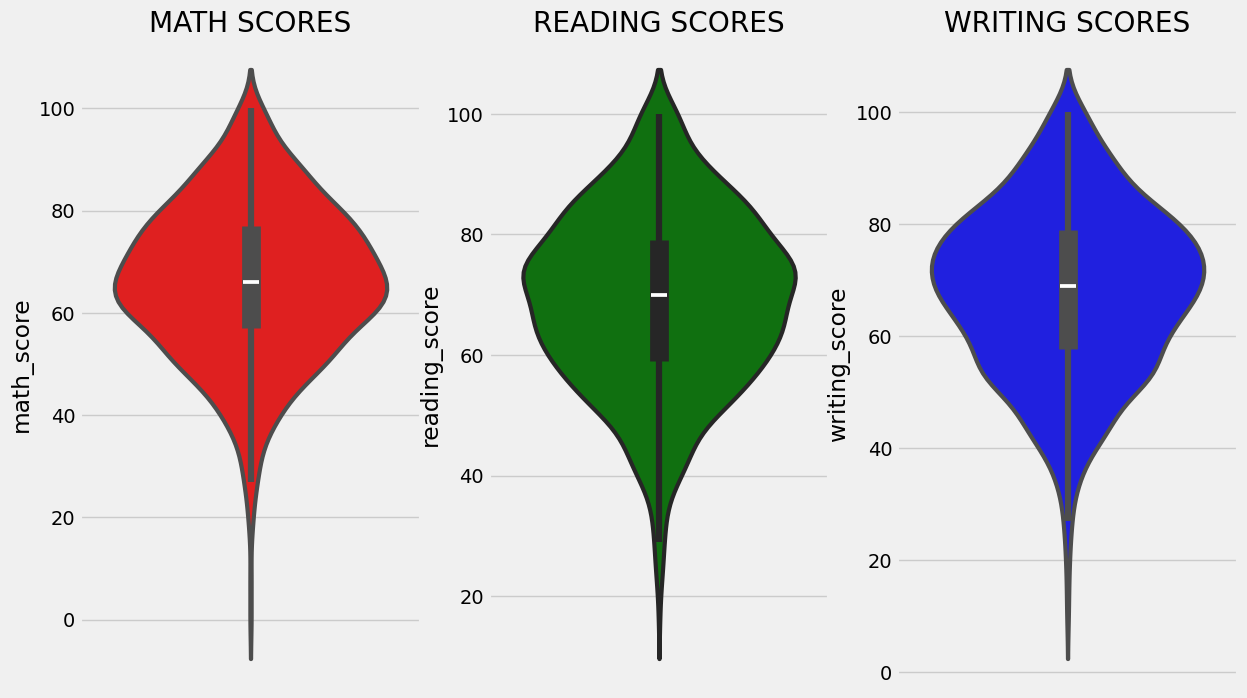

In [45]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()


<Axes: xlabel='count', ylabel='race_ethnicity'>

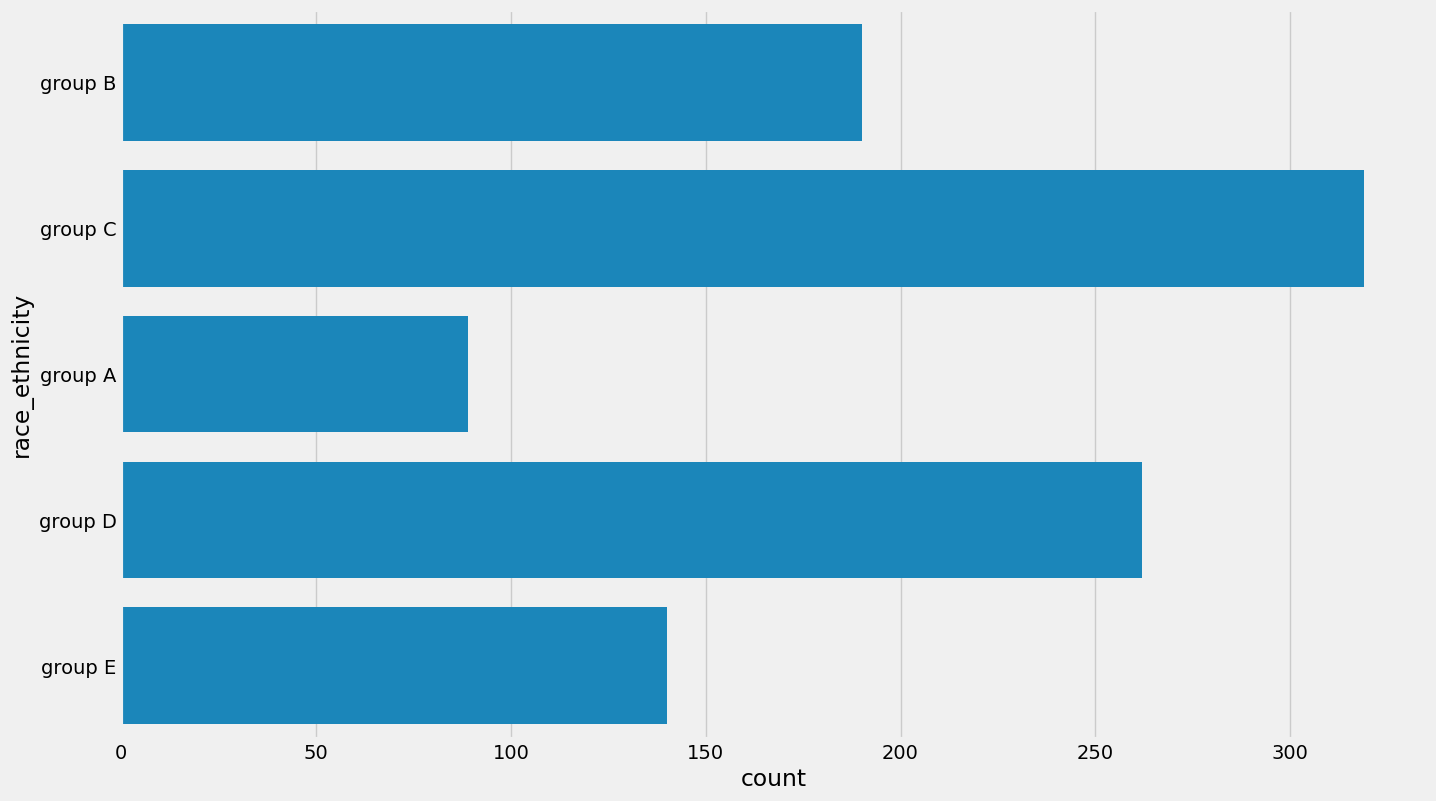

In [80]:
#f,ax = plt.subplots(1,2,figsize=(20,8))
# sns.barplot(x=df['race_ethnicity'].value_counts().index,y=df['race_ethnicity'].value_counts())
# plt.title("Total number of ethnicities",color='#005ce6',size=20)

sns.countplot(df['race_ethnicity'])


(np.float64(-1.25), np.float64(1.25), np.float64(-1.25), np.float64(1.25))

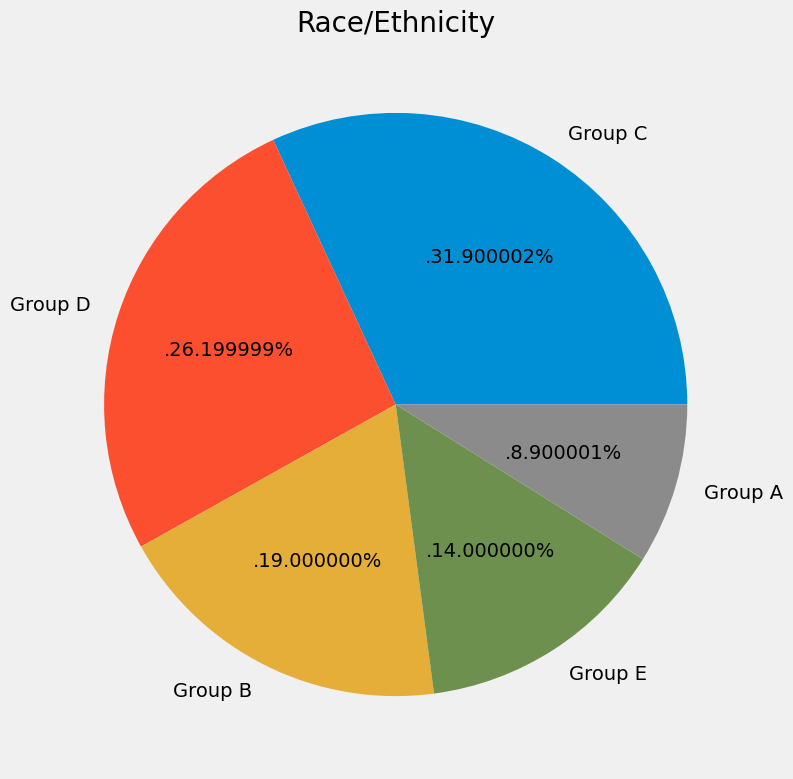

In [81]:

size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
#color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')

In [29]:
df['gender_map'] = df['gender'].map({"male":0,"female":1})

In [70]:
gender_group_mean = df.groupby('gender').mean(numeric_only=True)
gender_group_mean

,math_score,reading_score,writing_score,total score,average,gender_map
gender,,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498,1.0
male,68.728216,65.473029,63.311203,197.512448,65.837483,0.0


AttributeError: 'numpy.float64' object has no attribute 'index'

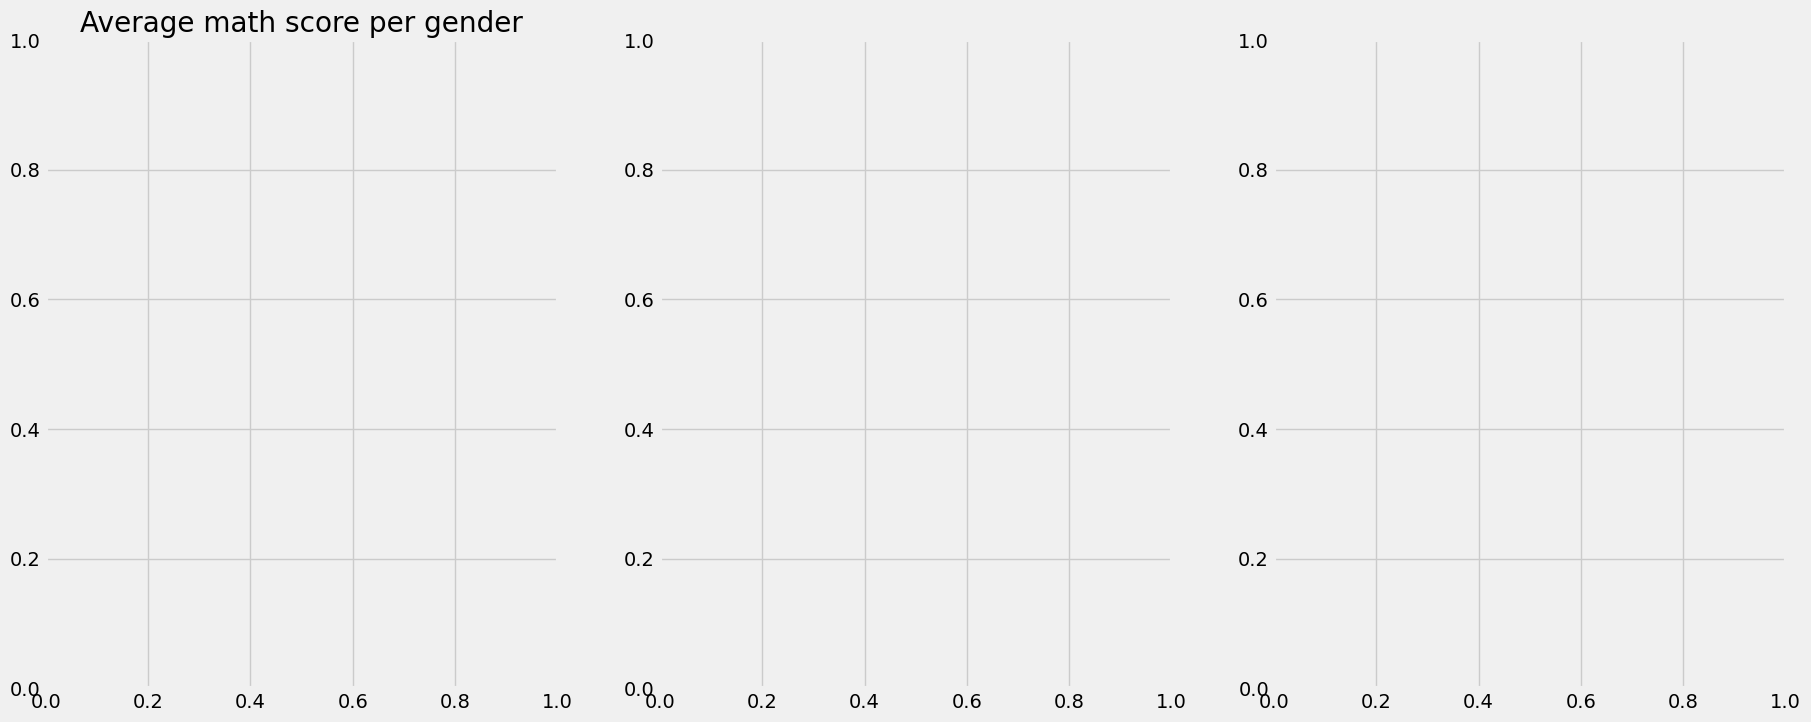

In [71]:

f,ax = plt.subplots(1,3,figsize=(20,8))

ax[0].set_title('Average math score per gender')
sns.barplot(x=gender_group_mean['math_score'].mean().index,y=gender_group_mean['math_score'].mean().values)
for container in ax[0].containers:
    ax[0].bar_label(container,color='Black')


sns.barplot(x=gender_group_mean['reading_score'].mean().index,y = gender_group_mean['reading_score'].mean().values)
ax[1].set_title('Average reading score per gender')
for container in ax[1].containers:
    ax[1].bar_label(container, color='green')

sns.barplot(x = gender_group_mean['writing_score'].mean().index,y=gender_group_mean['writing_score'].mean().values)
ax[2].set_title('Average writing score per gender')
for container in ax[2].containers:
    ax[2].bar_label(container,color='Black')


/var/folders/5q/t0vydvmd0l54twqf6m8prbhw0000gn/T/ipykernel_5125/1451682939.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['parental_level_of_education'], palette = 'Blues')


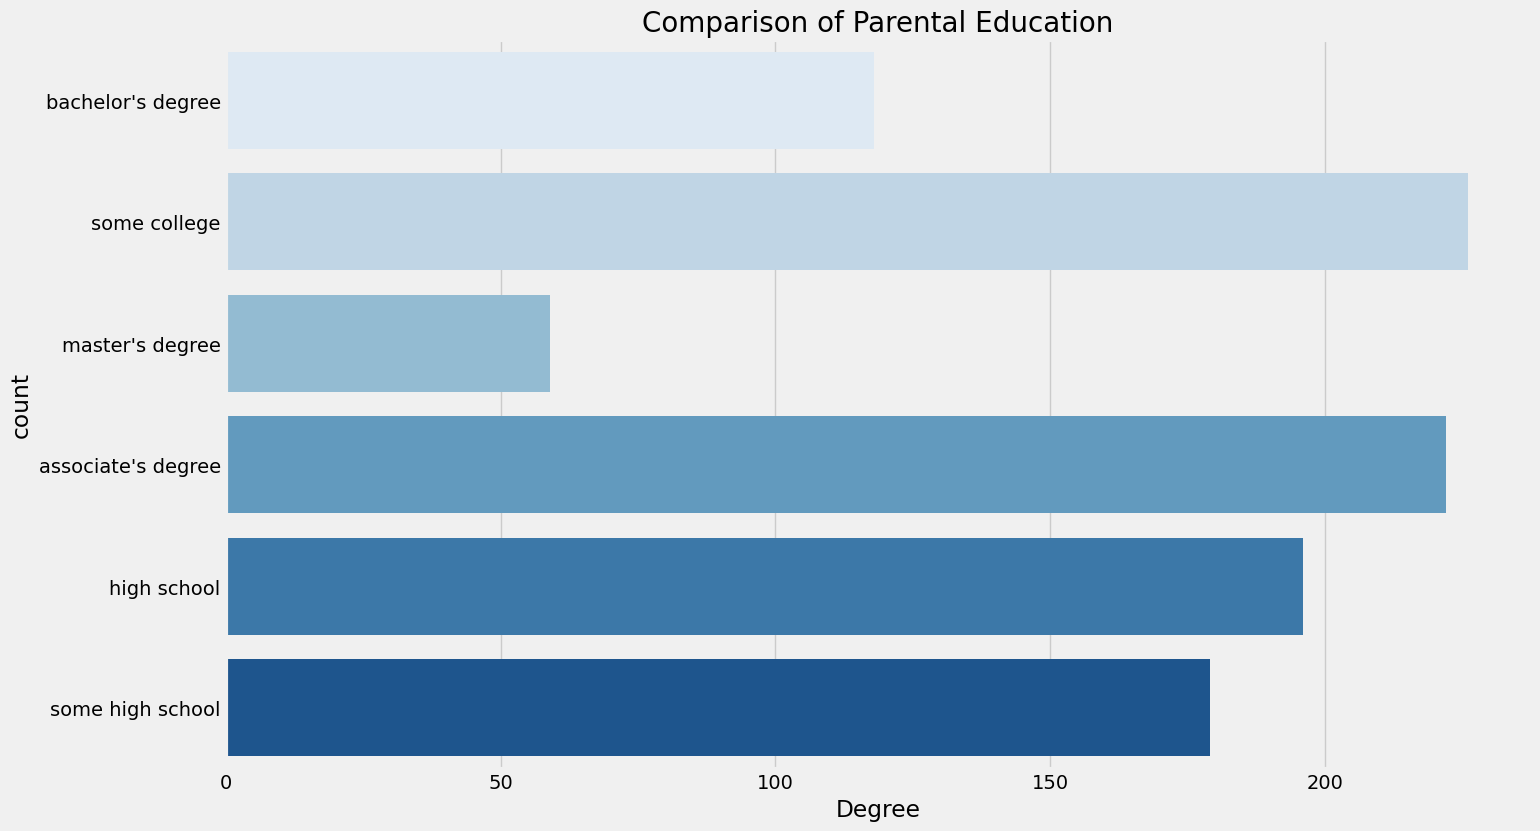

In [36]:

sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

In [66]:
Group_data2=df.groupby('race_ethnicity')
Group_data2.mean(numeric_only=True)

,math_score,reading_score,writing_score,total score,average,gender_map
race_ethnicity,,,,,,
group A,61.629213,64.674157,62.674157,188.977528,62.992509,0.404494
group B,63.452632,67.352632,65.600000,196.405263,65.468421,0.547368
group C,64.463950,69.103448,67.827586,201.394984,67.131661,0.564263
group D,67.362595,70.030534,70.145038,207.538168,69.179389,0.492366
group E,73.821429,73.028571,71.407143,218.257143,72.752381,0.492857


/var/folders/5q/t0vydvmd0l54twqf6m8prbhw0000gn/T/ipykernel_5125/827462696.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
/var/folders/5q/t0vydvmd0l54twqf6m8prbhw0000gn/T/ipykernel_5125/827462696.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
/var/folders/5q/t0vydvmd0l54twqf6m8prbhw0000gn/T/ipykernel_5125/827462696.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` 

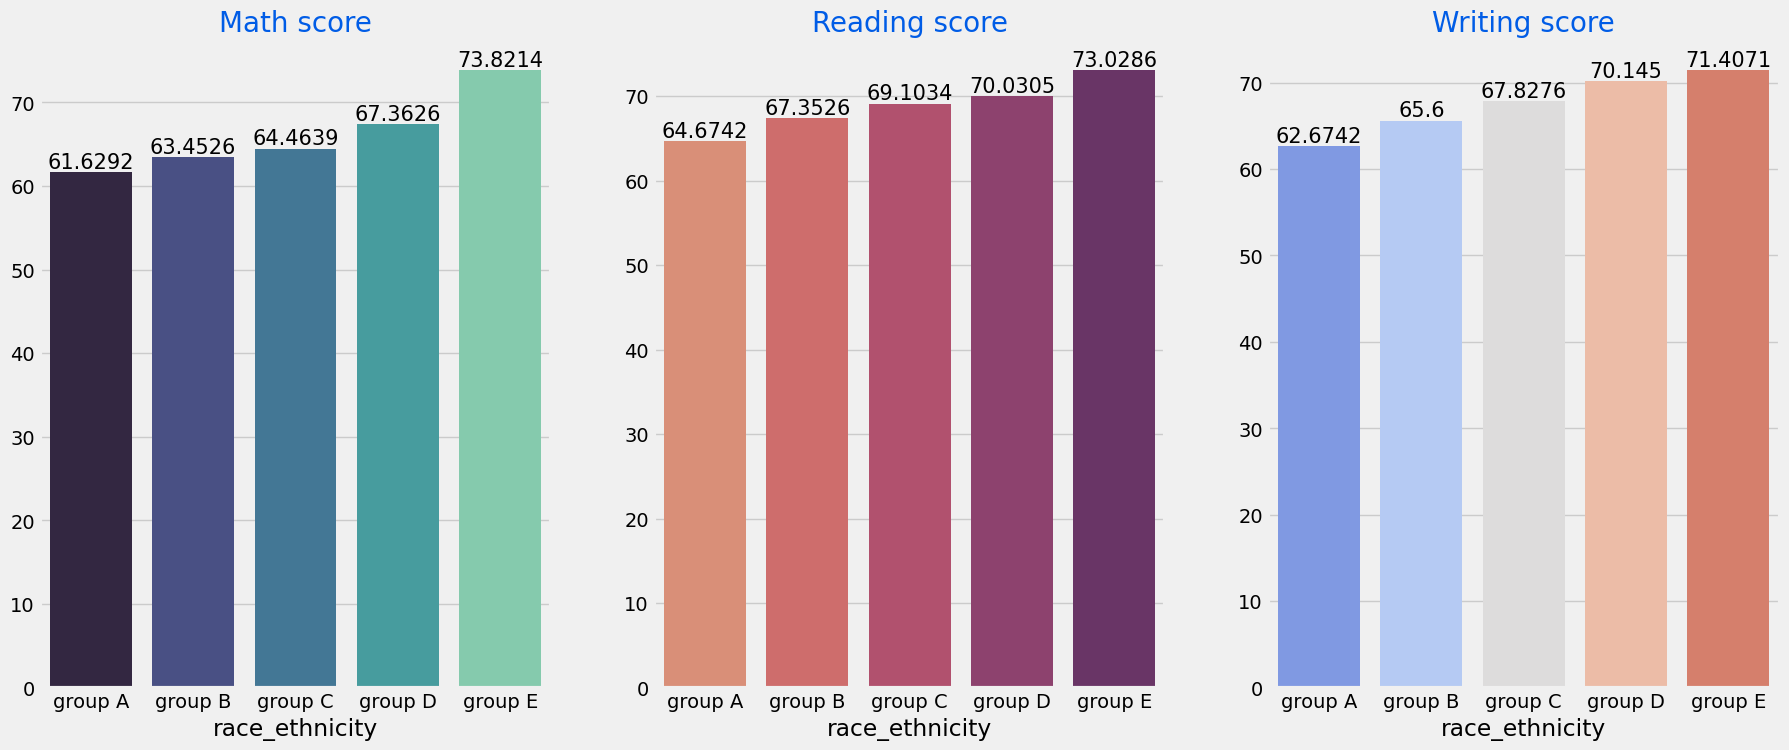

In [47]:

f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

/var/folders/5q/t0vydvmd0l54twqf6m8prbhw0000gn/T/ipykernel_5125/341897976.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
/var/folders/5q/t0vydvmd0l54twqf6m8prbhw0000gn/T/ipykernel_5125/341897976.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
/var/folders/5q/t0vydvmd0l54twqf6m8prbhw0000gn/T/ipykernel_5125/341897976.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` 

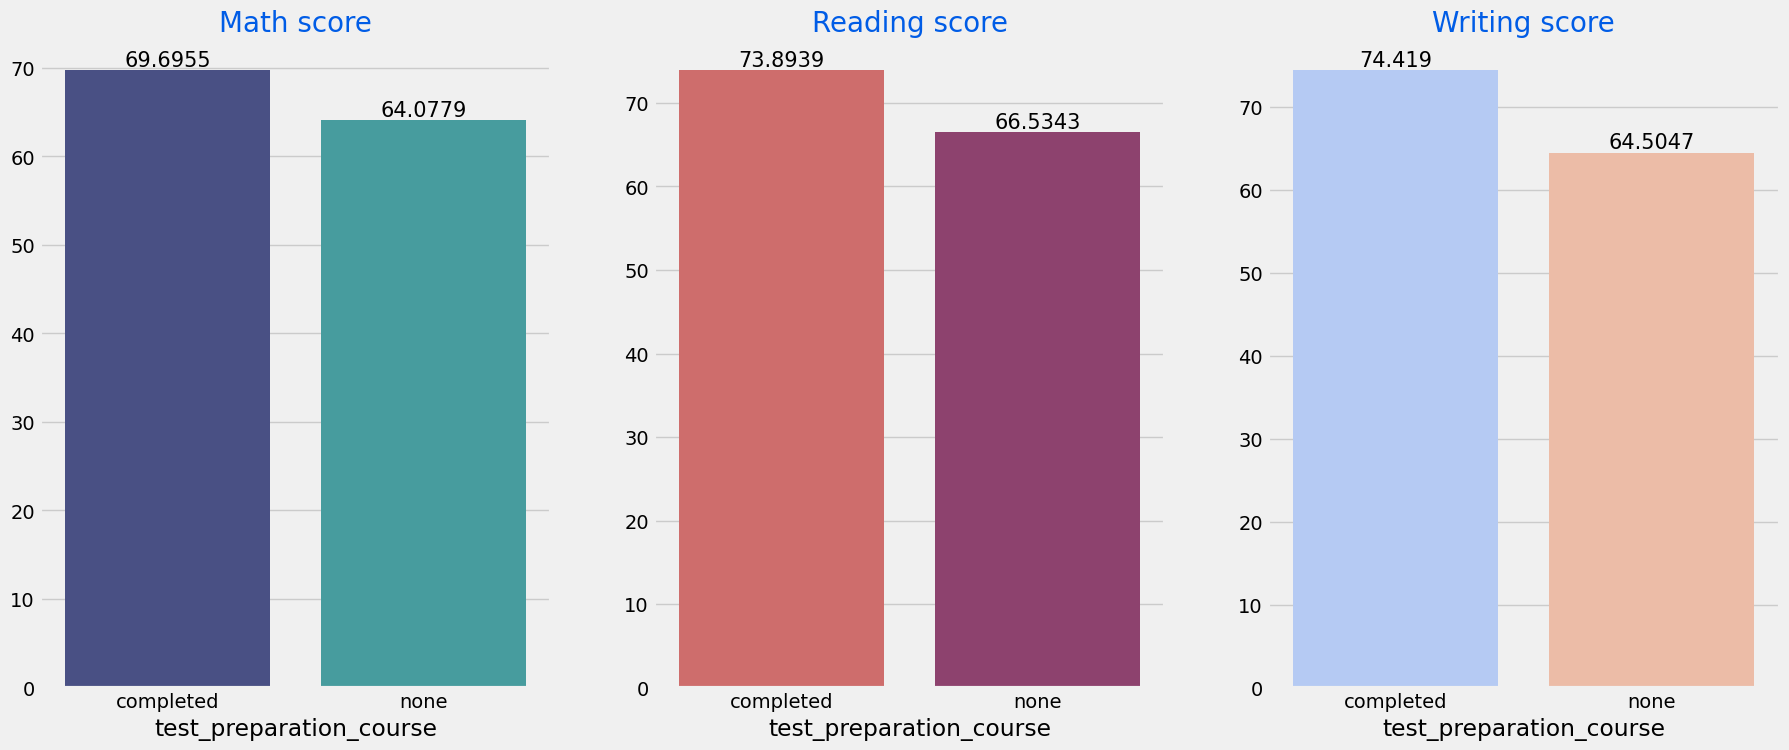

In [50]:
Group_data2=df.groupby('test_preparation_course')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)